In [138]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [139]:
auction=pd.read_csv(r'C:\Users\Divyam\Desktop\IPL\IPLPlayerAuctionData.csv')
auction["Team"].replace({"Delhi Daredevils": "Delhi Capitals", "Kings XI Punjab": "Punjab Kings"}, inplace=True)

pd.to_datetime(auction['Year'])
auction.head()

,Player,Role,Amount,Team,Year,Player Origin
0,Aaron Finch,Batsman,40000000,Sunrisers Hyderabad,2014.0,Overseas
1,Aaron Finch,Batsman,32000000,Mumbai Indians,2015.0,Overseas
2,Aaron Finch,Batsman,10000000,Gujarat Lions,2016.0,Overseas
3,Aaron Finch,Batsman,62000000,Punjab Kings,2018.0,Overseas
4,Aaron Finch,Batsman,44000000,Royal Challengers Bangalore,2020.0,Overseas


In [140]:
auction.head()


,Player,Role,Amount,Team,Year,Player Origin
0,Aaron Finch,Batsman,40000000,Sunrisers Hyderabad,2014.0,Overseas
1,Aaron Finch,Batsman,32000000,Mumbai Indians,2015.0,Overseas
2,Aaron Finch,Batsman,10000000,Gujarat Lions,2016.0,Overseas
3,Aaron Finch,Batsman,62000000,Punjab Kings,2018.0,Overseas
4,Aaron Finch,Batsman,44000000,Royal Challengers Bangalore,2020.0,Overseas


In [141]:
auction.dtypes

Player            object
Role              object
Amount             int64
Team              object
Year             float64
Player Origin     object
dtype: object

In [142]:
ATH_salary_for_players= auction.groupby('Player')[['Year','Amount']].max().sort_values(by='Amount',ascending=False)

In [143]:
Top_5 = ATH_salary_for_players[:5]
Bottom_5 = ATH_salary_for_players[-5:]

In [144]:
Top_5.head()

,Year,Amount
Player,,
Christopher Morris,2021.0,162500000
Yuvraj Singh,2019.0,160000000
Pat Cummins,2022.0,155000000
Ishan Kishan,2022.0,152500000
Kyle Jamieson,2021.0,150000000


In [145]:
Bottom_5.head()

,Year,Amount
Player,,
Baba Aparajith,2016.0,1000000
Shelley Shaurya,2017.0,1000000
Barinder Singh Saran,2015.0,1000000
Sayan Sekhar Mandal,2014.0,1000000
Manan Ajay Sharma,2016.0,1000000


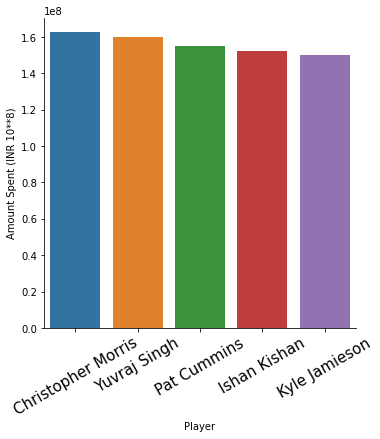

In [146]:
g1=sns.catplot(x=Top_5.index,y='Amount',data=Top_5,kind='bar')
g1.set_xticklabels(rotation=30,fontsize=15)
g1.set(ylabel='Amount Spent (INR 10**8)')





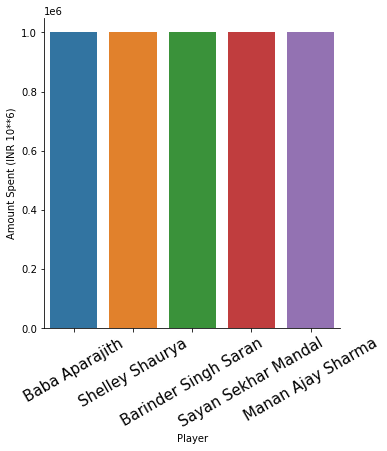

In [147]:
g2=sns.catplot(x=Bottom_5.index,y='Amount',data=Bottom_5,kind='bar')
g2.set_xticklabels(rotation=30,fontsize=15)
g2.set(ylabel='Amount Spent (INR 10**6)')


In [148]:
no_of_times_auctioned=auction['Player'].value_counts().sort_values(ascending=False).head()
no_of_times_auctioned.head()

Jaydev Unadkat         9
Nathan Coulter-Nile    7
Mohit Sharma           5
Aaron Finch            5
Glenn Maxwell          5
Name: Player, dtype: int64

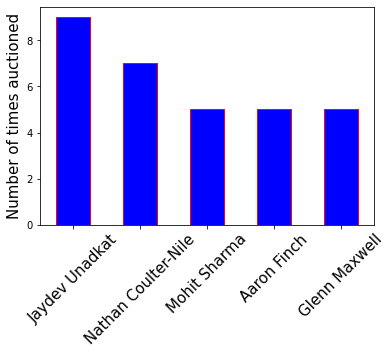

In [149]:
no_of_times_auctioned.plot(kind='bar',rot=45,color='blue',edgecolor='red')
plt.ylabel('Number of times auctioned',fontsize=15)
plt.xticks(fontsize=15)
plt.show()


In [150]:
auction.groupby('Year')['Amount'].max().sort_values(ascending=False)

Year
2021.0    162500000
2015.0    160000000
2020.0    155000000
2022.0    152500000
2017.0    145000000
2014.0    140000000
2018.0    125000000
2016.0     95000000
2019.0     84000000
2013.0     75000000
Name: Amount, dtype: int64

In [151]:
Total_amount_year=auction.groupby('Year')['Amount'].sum().sort_values(ascending=False)


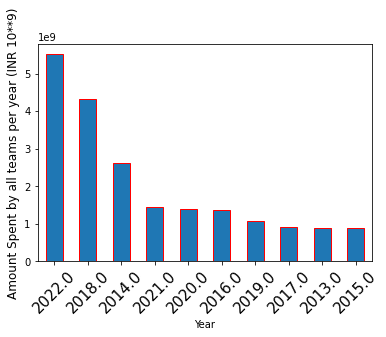

In [189]:
Total_amount_year.plot(kind='bar',rot=45,edgecolor='red')
plt.ylabel("Amount Spent by all teams per year (INR 10**9)",fontsize=12)
plt.xticks(fontsize=15)
plt.show()

In [153]:
Total_amount_team=auction.groupby('Team')['Amount'].sum().sort_values(ascending=False)

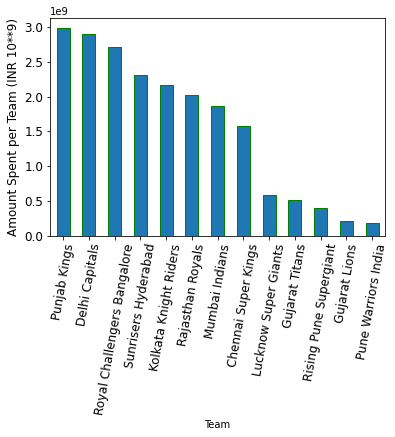

In [191]:
Total_amount_team.plot(kind='bar',rot=80,fontsize=12,edgecolor='green')
plt.ylabel("Amount Spent per Team (INR 10**9)",fontsize=12)
plt.show()

In [155]:
auction.groupby('Player Origin')[['Player Origin','Amount']].max()

,Player Origin,Amount
Player Origin,,
Indian,Indian,160000000
Overseas,Overseas,162500000


In [156]:
auction.groupby('Player Origin')[['Player Origin','Amount']].min()

,Player Origin,Amount
Player Origin,,
Indian,Indian,1000000
Overseas,Overseas,1000000


In [157]:
auction.groupby('Player Origin')[['Player Origin','Amount']].sum()

,Amount
Player Origin,
Indian,10090750000
Overseas,10332125000


In [158]:
#The curious case of Jaydev Unadkat

Jaydev_unadkat=auction[auction['Player']=='Jaydev Unadkat'][['Amount','Year']].sort_values('Year')
Jaydev_unadkat


,Amount,Year
355,39375000,2013.0
356,28000000,2014.0
357,11000000,2015.0
358,16000000,2016.0
359,3000000,2017.0
360,115000000,2018.0
361,84000000,2019.0
362,30000000,2020.0
363,13000000,2022.0


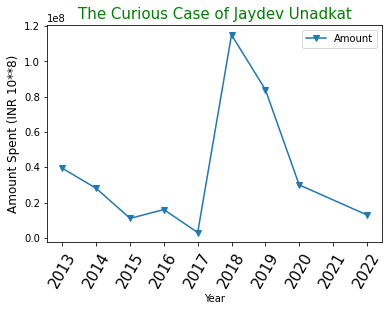

In [159]:
Jaydev_unadkat.plot(x='Year',y='Amount',kind='line',marker='v')
plt.xticks([2013,2014,2015,2016,2017,2018,2019,2020,2021,2022],fontsize=15,rotation=60)
plt.ylabel('Amount Spent (INR 10**8)',fontsize=12)
plt.title('The Curious Case of Jaydev Unadkat',fontsize=15,color='green')
plt.show()

In [160]:
ap=auction.groupby('Player')['Player','Amount'].sum().sort_values(by='Amount',ascending=False)
ap

<ipython-input-160-a378ffe6d70c>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  ap=auction.groupby('Player')['Player','Amount'].sum().sort_values(by='Amount',ascending=False)


,Amount
Player,
Glenn Maxwell,475000000
Yuvraj Singh,400000000
Christopher Morris,393375000
Dinesh Karthik,382000000
Jaydev Unadkat,339375000
...,...
Armaan Jaffer,1000000
Tanmay Mishra,1000000
Tejas Singh Baroka,1000000


In [161]:
ipl=pd.read_csv(r"C:\Users\Divyam\Desktop\IPL\4\IPL Matches 2008-2020.csv")

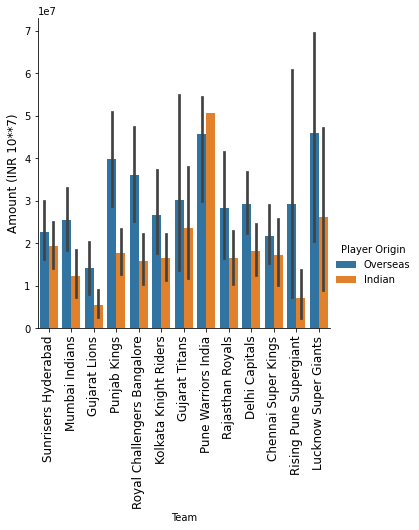

In [162]:
sns.catplot(x='Team',y='Amount',kind='bar',hue='Player Origin',data=auction)
plt.xticks(fontsize=12,rotation=90)
plt.ylabel('Amount (INR 10**7)',fontsize=12)
plt.show()

In [163]:
ipl.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [164]:
ipl['team1'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals'], dtype=object)

In [165]:
ipl["team1"].replace({"Delhi Daredevils": "Delhi Capitals", "Kings XI Punjab": "Punjab Kings",'Pune Warriors':'Rising Pune Supergiants','Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace=True)
ipl["team2"].replace({"Delhi Daredevils": "Delhi Capitals", "Kings XI Punjab": "Punjab Kings",'Pune Warriors':'Rising Pune Supergiants','Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace=True)
ipl["winner"].replace({"Delhi Daredevils": "Delhi Capitals", "Kings XI Punjab": "Punjab Kings",'Pune Warriors':'Rising Pune Supergiants','Rising Pune Supergiant':'Rising Pune Supergiants'}, inplace=True)

In [166]:
ipl['team1'].unique()

array(['Royal Challengers Bangalore', 'Punjab Kings', 'Delhi Capitals',
       'Mumbai Indians', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Deccan Chargers', 'Chennai Super Kings', 'Kochi Tuskers Kerala',
       'Rising Pune Supergiants', 'Sunrisers Hyderabad', 'Gujarat Lions'],
      dtype=object)

In [167]:
most_wins = ipl.winner.value_counts()


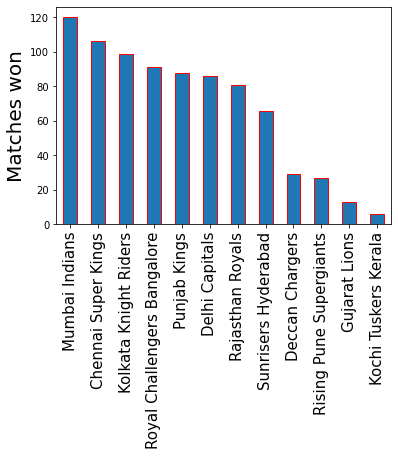

In [168]:
most_wins.plot(kind='bar',edgecolor='red')
plt.ylabel('Matches won',fontsize=20)
plt.xticks(fontsize=15)
plt.show()


In [169]:
ipl['toss_decision'].value_counts()

field    496
bat      320
Name: toss_decision, dtype: int64

In [170]:
ipl.dtypes

id                   int64
city                object
date                object
player_of_match     object
venue               object
neutral_venue        int64
team1               object
team2               object
toss_winner         object
toss_decision       object
winner              object
result              object
result_margin      float64
eliminator          object
method              object
umpire1             object
umpire2             object
dtype: object

In [171]:
ipl['date'] = pd.to_datetime(ipl['date'])

In [172]:
ipl.dtypes


id                          int64
city                       object
date               datetime64[ns]
player_of_match            object
venue                      object
neutral_venue               int64
team1                      object
team2                      object
toss_winner                object
toss_decision              object
winner                     object
result                     object
result_margin             float64
eliminator                 object
method                     object
umpire1                    object
umpire2                    object
dtype: object

In [173]:
ipl['year'] = pd.DatetimeIndex(ipl['date']).year

In [174]:
ipl.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [175]:
toss_dec=ipl.groupby('year')[['year','toss_decision']]
toss_dec.head()

,year,toss_decision
0,2008,field
1,2008,bat
2,2008,bat
3,2008,bat
4,2008,bat
...,...,...
756,2020,field
757,2020,field
758,2020,bat
759,2020,field


In [176]:
type(toss_dec)

pandas.core.groupby.generic.DataFrameGroupBy

In [177]:
ipl_field= ipl[ipl['toss_decision']=='field']
ipl_field

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar,2008
8,335990,Hyderabad,2008-04-24,YK Pathan,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,3.0,N,NaN,Asad Rauf,MR Benson,2008
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Punjab Kings,Mumbai Indians,Mumbai Indians,field,Punjab Kings,runs,66.0,N,NaN,Aleem Dar,AM Saheba,2008
10,335992,Bangalore,2008-04-26,SR Watson,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,7.0,N,NaN,MR Benson,IL Howell,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,1216537,Abu Dhabi,2020-10-30,BA Stokes,Sheikh Zayed Stadium,0,Punjab Kings,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,7.0,N,NaN,CB Gaffaney,S Ravi,2020
803,1216539,Dubai,2020-09-25,PP Shaw,Dubai International Cricket Stadium,0,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,Delhi Capitals,runs,44.0,N,NaN,KN Ananthapadmanabhan,RK Illingworth,2020
811,1216547,Dubai,2020-09-28,AB de Villiers,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,Royal Challengers Bangalore,tie,NaN,Y,NaN,Nitin Menon,PR Reiffel,2020
812,1237177,Dubai,2020-11-05,JJ Bumrah,Dubai International Cricket Stadium,0,Mumbai Indians,Delhi Capitals,Delhi Capitals,field,Mumbai Indians,runs,57.0,N,NaN,CB Gaffaney,Nitin Menon,2020


In [178]:
ipl_bat= ipl[ipl['toss_decision']=='bat']
ipl_bat

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Capitals,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Punjab Kings,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,1216544,Dubai,2020-10-25,RD Gaikwad,Dubai International Cricket Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Royal Challengers Bangalore,bat,Chennai Super Kings,wickets,8.0,N,NaN,C Shamshuddin,RK Illingworth,2020
809,1216545,Abu Dhabi,2020-09-26,Shubman Gill,Sheikh Zayed Stadium,0,Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,7.0,N,NaN,CB Gaffaney,VK Sharma,2020
810,1216546,Dubai,2020-10-20,S Dhawan,Dubai International Cricket Stadium,0,Delhi Capitals,Punjab Kings,Delhi Capitals,bat,Punjab Kings,wickets,5.0,N,NaN,C Shamshuddin,RK Illingworth,2020
814,1237180,Abu Dhabi,2020-11-08,MP Stoinis,Sheikh Zayed Stadium,0,Delhi Capitals,Sunrisers Hyderabad,Delhi Capitals,bat,Delhi Capitals,runs,17.0,N,NaN,PR Reiffel,S Ravi,2020


In [179]:
field=ipl_field.groupby('year')['toss_decision'].count()
field.head()

year
2008    32
2009    22
2010    21
2011    48
2012    37
Name: toss_decision, dtype: int64

In [180]:
bat=ipl_bat.groupby('year')['toss_decision'].count()
bat.head()

year
2008    26
2009    35
2010    39
2011    25
2012    37
Name: toss_decision, dtype: int64

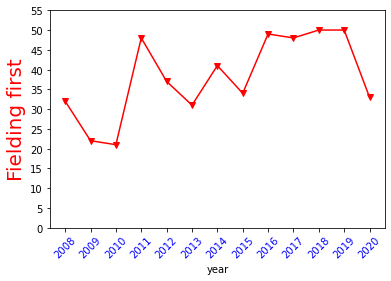

In [181]:
field.plot(color='red',fontsize=10,marker='v')
plt.ylabel('Fielding first',fontsize=20,color='red')
plt.xticks(np.arange(2008,2021,1),rotation=45,color='blue')
plt.yticks(np.arange(0,60,5))



plt.show()

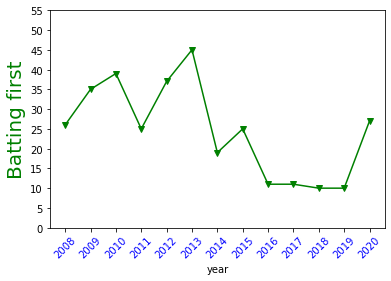

In [182]:
bat.plot(color='green',fontsize=10,marker='v')
plt.ylabel('Batting first',fontsize=20,color='green')
plt.xticks(np.arange(2008,2021,1),rotation=45,color='blue')
plt.yticks(np.arange(0,60,5))
plt.show()